# 1. HOG

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(128, 64, 3)


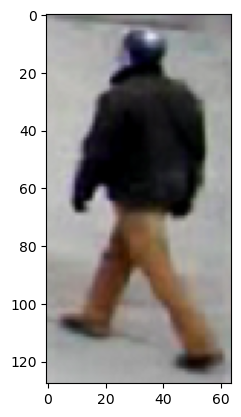

In [78]:
src = cv2.imread('./image/man.png')
print(src.shape)
plt.imshow(src)
plt.show()

In [79]:
#1: HoG in color image with default
hog = cv2.HOGDescriptor()
des = hog.compute(src)
print('des.shape=', des.shape)
print('des=', des)

des.shape= (3780,)
des= [0.01308054 0.00584509 0.04909251 ... 0.04155609 0.02162938 0.08109097]


In [4]:
#2. parameter customizing
winSize           = (64, 128) # 물체 검출 윈도우의 크기, 기본값:(64,128)
blockSize         = (16, 16) # 화소 단위의 블록 크기, 기본값:(16,16)
blockStride       = (8, 8) # 블록을 움직이는 간격, 기본값:(8,8)
cellSize          = (8, 8) # _cellSize는 셀 크기, 기본값:(8,8)
nbins             = 9 # 히스토그램 빈의 크기, 기본값:9
derivAperture     = 1 # 미분 계산을 위한 윈도우의 크기, 기본값:1(3*3으로 계산)
winSigma          = -1 # 가우시안 스무딩 파라미터로 윈도우의 크기에 따라 계산, 기본값:-1
histogramNormType = 0 # L2-Hys 정규화 임계값으로 기본값은 0.2
L2HysThreshold    = 0.2 # L2HysThreshold 임계값을 적용하고 L2-놈으로 정규화
gammaCorrection   = True # True면 감마 보정 수행
nlevels           = 64 # 최대 검출 깊이 64가 기본값
signedGradient    = False # False일때 그라디언트 범위가[0,180], True일때 [0,360], 기본값:False


# 자세한 파라미터는 구글링
hog2 = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture, 
                         winSigma, histogramNormType, L2HysThreshold,
                         gammaCorrection, nlevels, signedGradient)

des2 = hog2.compute(src)
print('des2.shape=', des2.shape)
print('des2=', des2)

des2.shape= (3780,)
des2= [0.01308054 0.00584509 0.04909251 ... 0.04155609 0.02162938 0.08109097]


In [5]:
#3 HoG in grayscale image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
des3 = hog.compute(gray)
print('des3.shape=', des3.shape)
print('des3=', des3)
# 값이 조금 바뀌었음

des3.shape= (3780,)
des3= [0.00893402 0.01081526 0.02545157 ... 0.0347785  0.03489022 0.08337955]


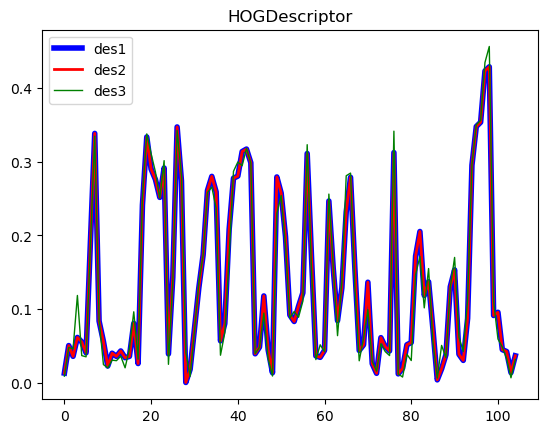

In [6]:
#4 display graph
plt.title('HOGDescriptor')
plt.plot(des[::36], color='b', linewidth=4, label='des1') # 36개씩 샘플링
plt.plot(des2[::36], color='r', linewidth=2, label='des2')
plt.plot(des3[::36], color='g', linewidth=1, label='des3')
plt.legend(loc='best')
plt.show()

# 2. HOG_SVM

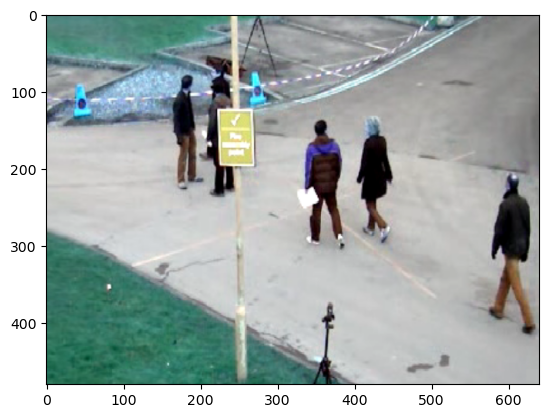

In [7]:
#1
src = cv2.imread('./image/people.png')
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

plt.imshow(src)
plt.show()

len(loc1)= 0
weights1= ()


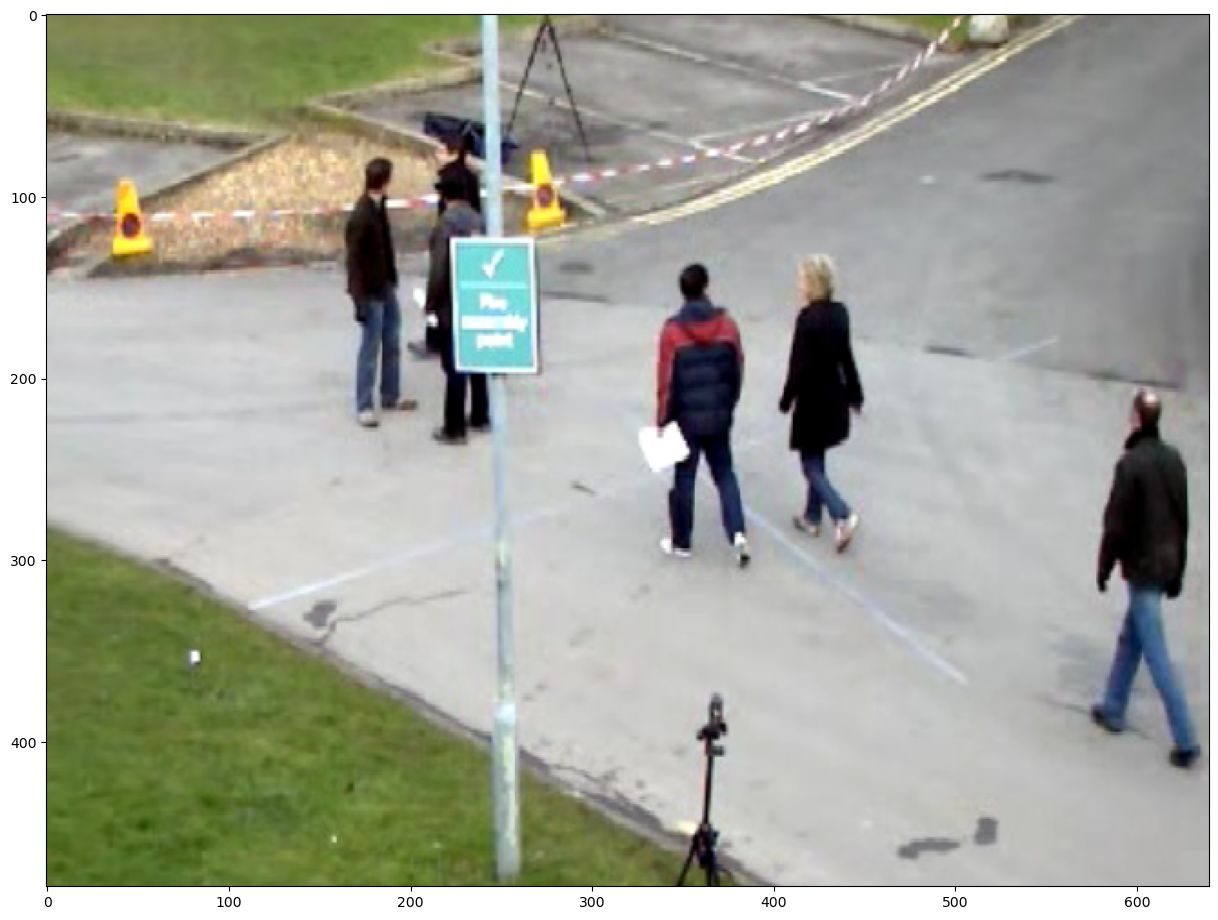

In [8]:
#2
loc1, weights1 = hog.detect(src)
print('len(loc1)=', len(loc1))
print('weights1=', weights1)

dst1 = src.copy()
w, h = hog.winSize
for pt in loc1:
    x, y = pt
    cv2.rectangle(dst, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
dst1_rgb = cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst1_rgb)
plt.show()

len(loc2)= 3
weights2= [2.22278994 3.51386275 2.27101835]


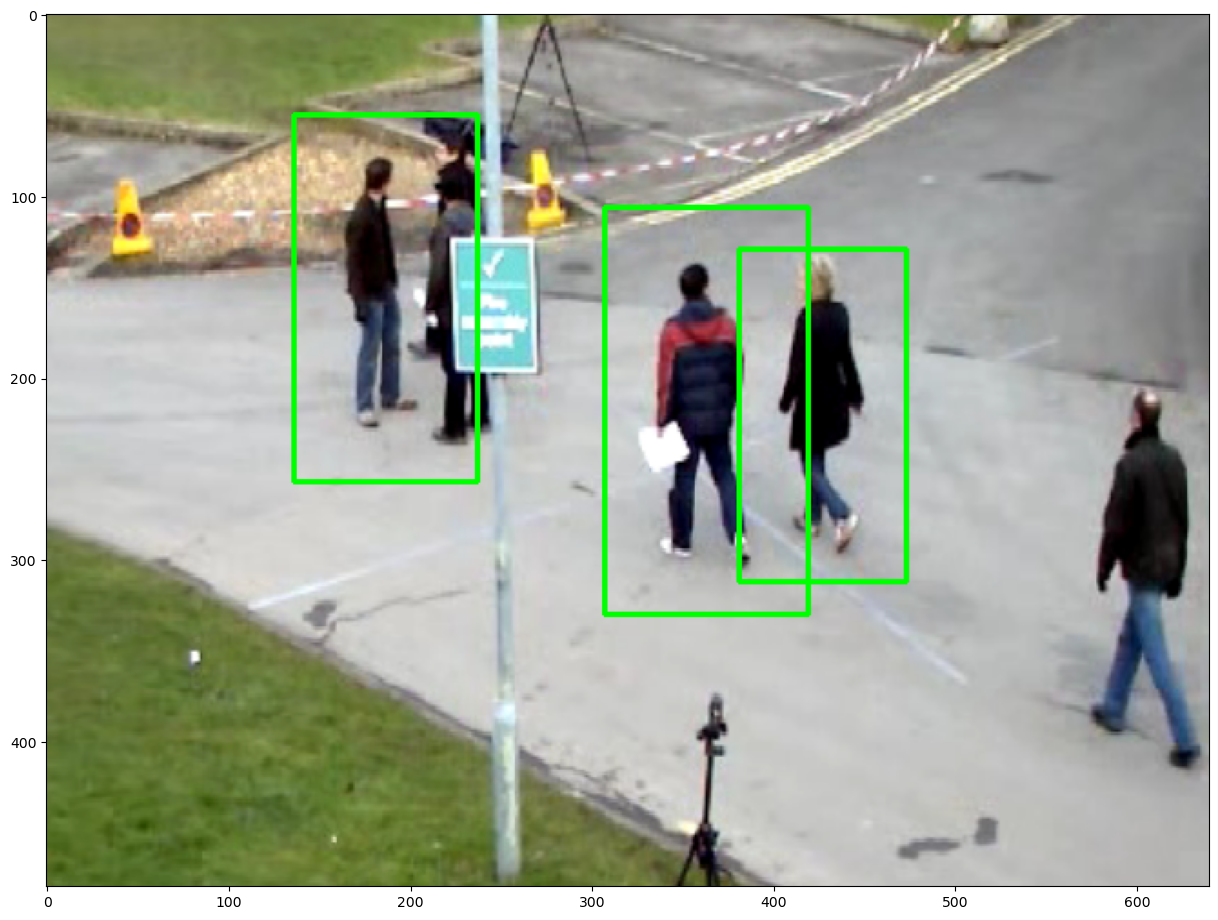

In [9]:
# 3 MultiScale
dst2 = src.copy()
loc2, weights2 = hog.detectMultiScale(src)
print('len(loc2)=', len(loc2))
print('weights2=', weights2)

for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst2_rgb)
plt.show()
# 몇 명은 검출

len(loc2)= 6
weights2= [2.4992378  2.40610977 3.82788089 1.13816943 0.64257275 0.37325626]


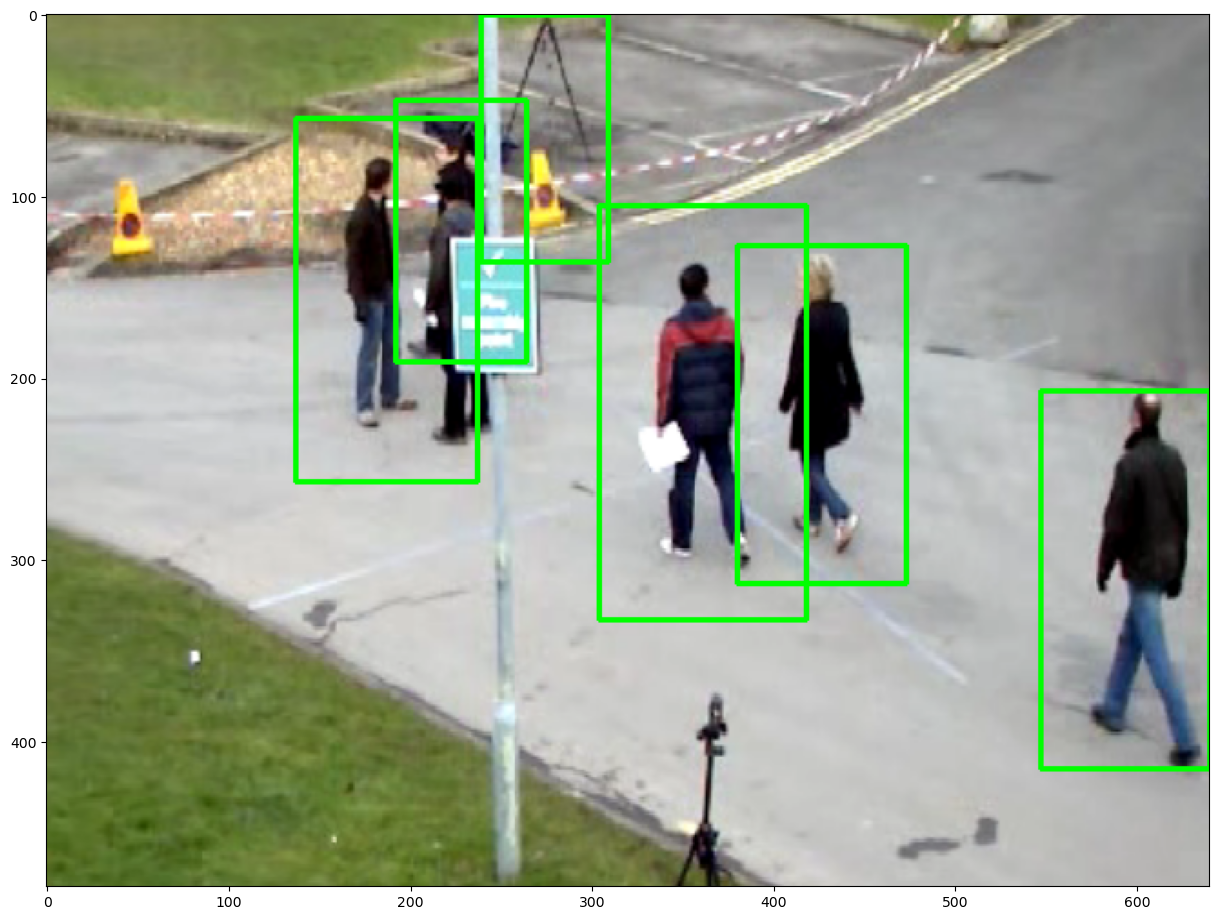

In [10]:
# 4 Multi Scale with Stride, padding option
dst2 = src.copy()
loc2, weights2 = hog.detectMultiScale(src, winStride=(1,1), padding=(8,8)) 
print('len(loc2)=', len(loc2))
print('weights2=', weights2)

for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst2_rgb)
plt.show()
# 몇 명은 검출

len(loc3)= 6
weights3= [2.4992378  2.40610977 3.82788089 1.13816943 0.64257275 0.37325626]


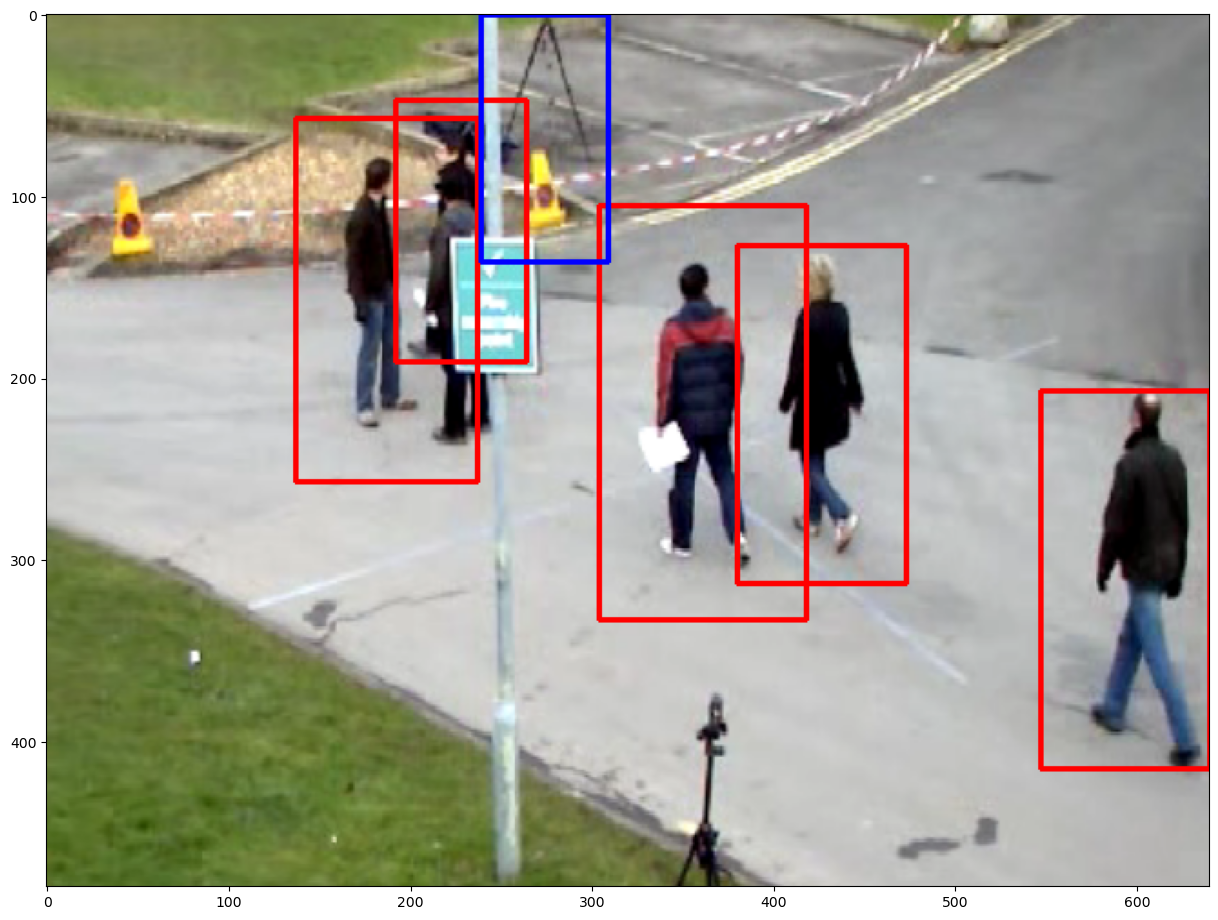

In [11]:
# 5 weight(신뢰도)로 확률값 낮은 것 제거
dst3 = src.copy()
loc3, weights3 = hog.detectMultiScale(src, winStride=(1,1), padding=(8,8))
print('len(loc3)=', len(loc3))
print('weights3=', weights3)

for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weights3[i] > 0.5:
        cv2.rectangle(dst3, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        cv2.rectangle(dst3, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
dst3_rgb = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst3_rgb)
plt.show()

# 실습

(914, 398, 3)


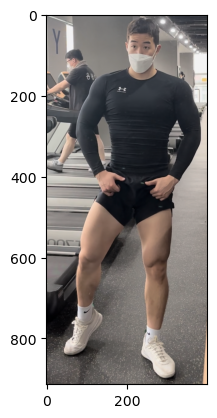

des.shape= (15717240,)
des= [0.01783315 0.01317545 0.01976945 ... 0.12542805 0.09180685 0.36966002]
des2.shape= (15717240,)
des2= [0.01840069 0.01226615 0.0184583  ... 0.12082201 0.07202667 0.37886414]
des3.shape= (15717240,)
des3= [0.01940717 0.01450291 0.01492571 ... 0.12895593 0.08873362 0.35709244]


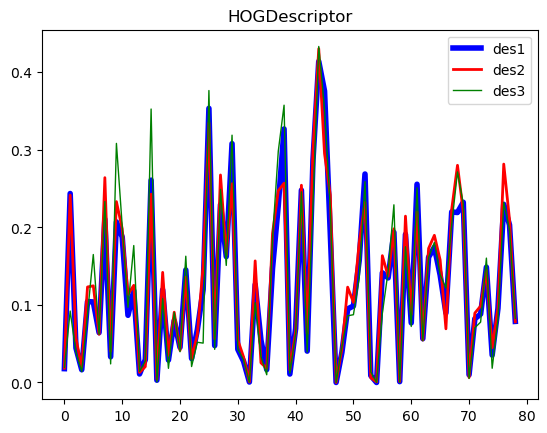

In [82]:
src = cv2.imread('./image/sangrok1.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
print(src.shape)
plt.imshow(src)
plt.show()

#1: HoG in color image with default
hog = cv2.HOGDescriptor()
des = hog.compute(src)
print('des.shape=', des.shape)
print('des=', des)

#2. parameter customizing
winSize           = (64, 128) # 물체 검출 윈도우의 크기, 기본값:(64,128)
blockSize         = (16, 16) # 화소 단위의 블록 크기, 기본값:(16,16)
blockStride       = (8, 8) # 블록을 움직이는 간격, 기본값:(8,8)
cellSize          = (8, 8) # _cellSize는 셀 크기, 기본값:(8,8)
nbins             = 9 # 히스토그램 빈의 크기, 기본값:9
derivAperture     = 1 # 미분 계산을 위한 윈도우의 크기, 기본값:1(3*3으로 계산)
winSigma          = -1 # 가우시안 스무딩 파라미터로 윈도우의 크기에 따라 계산, 기본값:-1
histogramNormType = 0 # L2-Hys 정규화 임계값으로 기본값은 0.2
L2HysThreshold    = 0.2 # L2HysThreshold 임계값을 적용하고 L2-놈으로 정규화
gammaCorrection   = False # True면 감마 보정 수행
nlevels           = 64 # 최대 검출 깊이 64가 기본값
signedGradient    = False # False일때 그라디언트 범위가[0,180], True일때 [0,360], 기본값:False
hog2 = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture, 
                         winSigma, histogramNormType, L2HysThreshold,
                         gammaCorrection, nlevels, signedGradient)

des2 = hog2.compute(src)
print('des2.shape=', des2.shape)
print('des2=', des2)

#3 HoG in grayscale image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
des3 = hog.compute(gray)
print('des3.shape=', des3.shape)
print('des3=', des3)
# 값이 조금 바뀌었음

#4 display graph
plt.title('HOGDescriptor')
plt.plot(des[::200000], color='b', linewidth=4, label='des1') # 20000개씩 샘플링
plt.plot(des2[::200000], color='r', linewidth=2, label='des2')
plt.plot(des3[::200000], color='g', linewidth=1, label='des3')
plt.legend(loc='best')
plt.show()

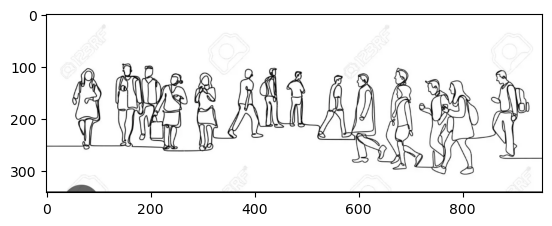

len(loc3)= 17
weights3= [1.71534472 3.41695324 3.37418653 3.25310573 0.16041423 0.66194711
 0.59772692 0.84803112 1.36220728 0.28881515 1.05144092 0.46108888
 1.66636428 1.80422743 4.58745056 1.09842586 1.33967681]


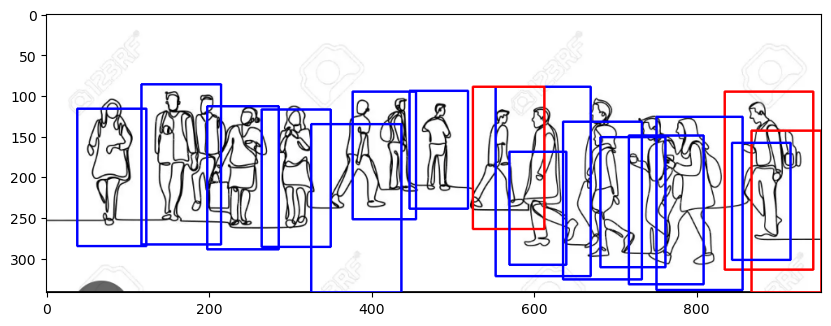

In [94]:
#1
src = cv2.imread('./image/people5.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

plt.imshow(src)
plt.show()


# 5 weight(신뢰도)로 확률값 낮은 것 제거
dst3 = src.copy()
loc3, weights3 = hog.detectMultiScale(src, winStride=(1,1), padding=(16,16))
print('len(loc3)=', len(loc3))
print('weights3=', weights3)

for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weights3[i] > 0.5:
        cv2.rectangle(dst3, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        cv2.rectangle(dst3, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
plt.figure(figsize=(10, 20))
plt.imshow(dst3)
plt.show()

# Stitching

status= 0


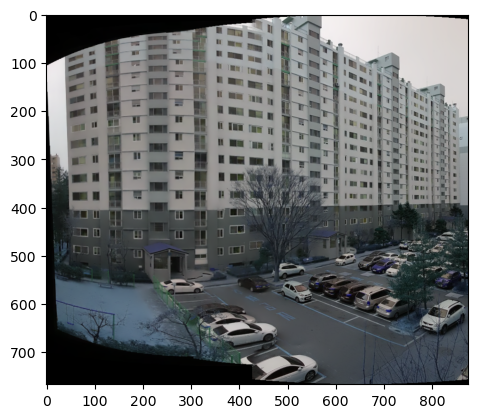

In [3]:
# 영상이 어디가 이상한지 찾고 수정 미션: 5분
import cv2
import numpy as np
from matplotlib import pyplot as plt

#1 stitching (바느질)
path = './image/'
src1 = cv2.imread(path + 'stitch_image1.jpg')
src2 = cv2.imread(path + 'stitch_image2.jpg')
src3 = cv2.imread(path + 'stitch_image3.jpg')
src4 = cv2.imread(path + 'stitch_image4.jpg')

stitcher = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)

status, dst2 = stitcher.stitch((src1, src2))
status, dst3 = stitcher.stitch((dst2, src3))
status, dst4 = stitcher.stitch((dst3, src4))

print('status=', status)

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('src3', src3)
# cv2.imshow('src4', src4)
# cv2.imshow('dst4', dst4)

plt.imshow(dst4)

# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

status= 0


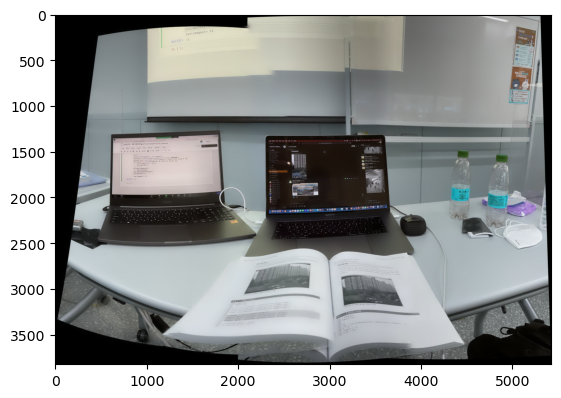

In [5]:
# 영상이 어디가 이상한지 찾고 수정 미션: 5분
import cv2
import numpy as np
from matplotlib import pyplot as plt
#1 stitching (바느질)
src1 = cv2.imread('./image/stitching_1.jpg')
src2 = cv2.imread('./image/stitching_2.jpg')
src3 = cv2.imread('./image/stitching_3.jpg')
src4 = cv2.imread('./image/stitching_4.jpg')

stitcher = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)

status, dst2 = stitcher.stitch((src1, src2))
status, dst3 = stitcher.stitch((dst2, src3))
status, dst4 = stitcher.stitch((dst3, src4))

print('status=', status)

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('src3', src3)
# cv2.imshow('src4', src4)
# cv2.imshow('dst4', dst4)

plt.imshow(dst4)

# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/matplotlib/_api/__init__.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


ValueError: array([[[251, 251, 251],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [161, 161, 161]],

       [[251, 251, 251],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [161, 161, 161],
        [162, 162, 162],
        [162, 162, 162]],

       [[254, 251, 252],
        [254, 251, 252],
        [254, 251, 252],
        ...,
        [156, 156, 156],
        [157, 157, 157],
        [157, 157, 157]],

       ...,

       [[ 12,  20,  24],
        [ 12,  20,  24],
        [ 12,  20,  24],
        ...,
        [205, 196, 189],
        [168, 153, 146],
        [ 61,  42,  36]],

       [[  4,  12,  16],
        [  7,  15,  19],
        [  9,  17,  21],
        ...,
        [206, 197, 189],
        [210, 199, 192],
        [190, 179, 171]],

       [[  1,   9,  13],
        [  0,   8,  12],
        [  6,  12,  16],
        ...,
        [203, 194, 186],
        [204, 195, 187],
        [204, 195, 187]]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

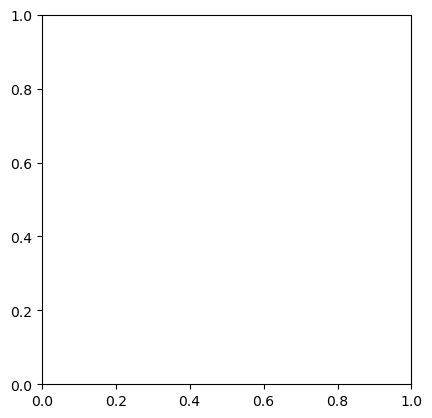

In [10]:
import cv2
path = './image/'
#1
cap = cv2.VideoCapture(path + 'stitch_videoInput.mp4')

t = 0
images = []
STEP = 20
while True:
    t += 1
    retval, frame = cap.read() # frame 이 이미지
    if not retval:
        break
    img = cv2.resize(frame, dsize=(640, 480)) # 이미지 리사이즈
    img = cv2.flip(img, -1)
    if t%STEP == 0:
        # 여기에 hog라인을 추가하면 된다.
        images.append(img) # 20번째마다 이미지를 하나씩 추가, 즉 입력만 동영상이지 스티칭은 똑같다.
        
    # 동영상 출력
    cv2.imshow('img', img)
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
# 2
print('len(images)=', len(images))
stitcher = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
status, dst = stitcher.stitch(images) # 한꺼번에 11개의 영상을 쭉 나열
if status == cv2.STITCHER_OK: # 스티칭이 잘 되었다면, 0값
    cv2.imshow('dst', dst)
    cv2.waitKey()
if cap.isOpened() :
    cap.release()
    

cv2.destroyAllWindows()
cv2.waitKey(1)


# 차선 검출
> bitwise_and : mask 영역에서 서로 공통으로 겹치는 부분 출력 <br>
> bitwise_or : mask 영역의 두 이미지를 합쳐버림 <br>
> bitwise_xor : <br>
> bitwise_not : mask 영역에서 보색 출력

# 함수 생성

In [4]:
def grayscale(img) :
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# cannay edge detection
def canny(img, low_th, high_th) :
    return cv2.Canny(img, low_th, high_th)


def region_of_interest(img, vertices) :
    # 사진과 같은 크기로 검정 배경 생성
    mask = np.zeros_like(img)
    
    if len(img.shape) > 2 :
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else :
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    return cv2.bitwise_and(img, mask), mask

def draw_lines(img, lines, color=[255,0,0], thickness=5) :
    for line in lines :
        for x1,y1,x2,y2 in line :
            cv2.line(img, (x1,y1), (x2,y2), color, thickness)
            
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap) :
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                           minLineLength=min_line_len,
                           maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, a=0.8, b=1., r=0.):
    return cv2.addWeighted(initial_img, a, img, b, r)
    

### Lane detection

imshape : 
 (704, 1279, 3)
vertices : 
 [[[ 100  704]
  [ 550  320]
  [ 650  320]
  [1259  704]]]


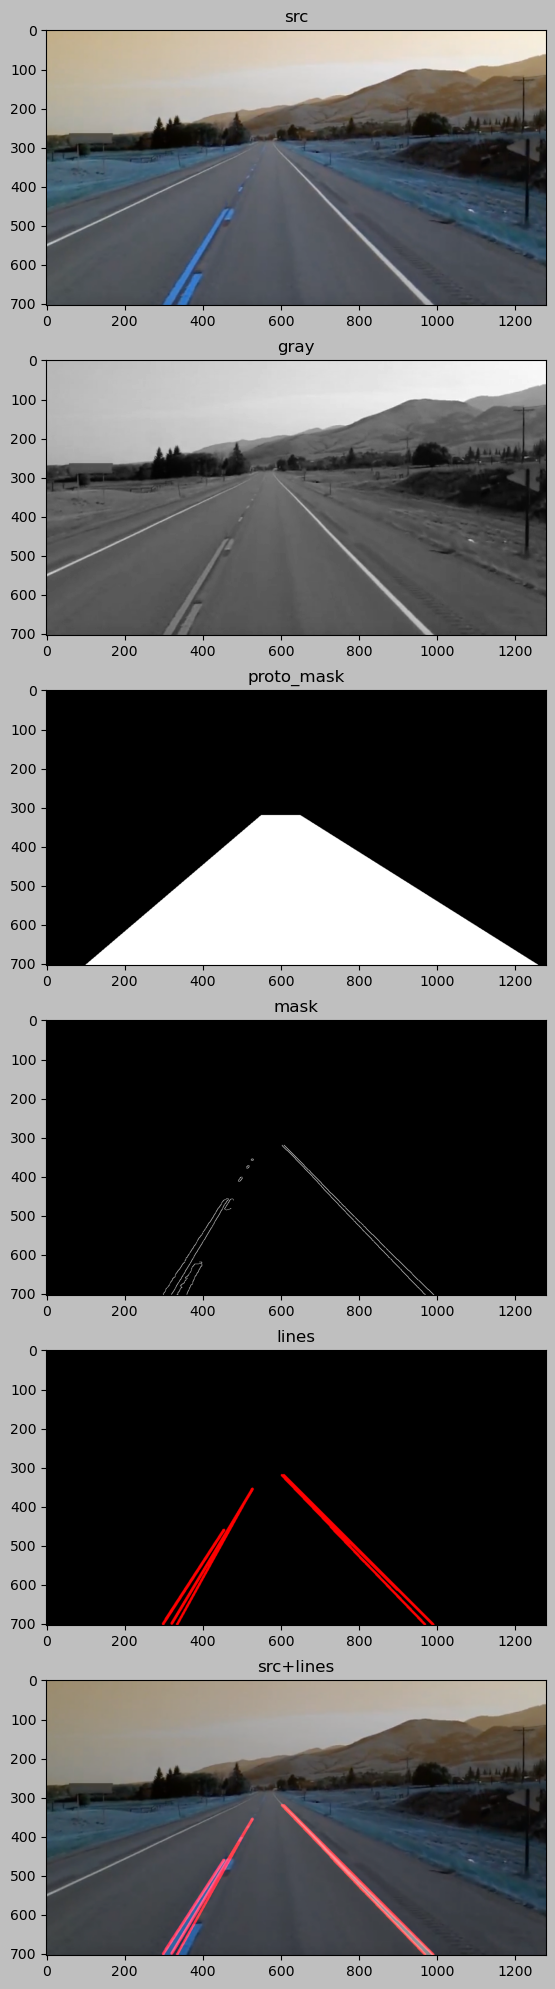

In [185]:
src = cv2.imread('./image/lane.jpg')
gray = grayscale(src)
blur_gray = gaussian_blur(gray, 5)
edges = canny(blur_gray, 50, 75)

# 추출할 차선 영역 지정
imshape = src.shape
vertices = np.array([[(100, imshape[0]), 
                      (550, 320), 
                      (650, 320),
                      (imshape[1]-20, imshape[0])]],
                   dtype=np.int32)
mask, proto_mask = region_of_interest(edges, vertices)
print("imshape : \n", imshape)
print("vertices : \n", vertices)

# HoughLinesP로 검출
lines = hough_lines(mask, 2, np.pi/180, 100, 100, 250)

# src + lines
lines_edges = weighted_img(lines, src)


plt.style.use("grayscale")
plt.figure(figsize=(20,25))


ax1 = plt.subplot(6,1,1)
ax2 = plt.subplot(6,1,2)
ax3 = plt.subplot(6,1,3)
ax4 = plt.subplot(6,1,4)
ax5 = plt.subplot(6,1,5)
ax6 = plt.subplot(6,1,6)


ax1.imshow(src, cmap="gray")
ax2.imshow(gray)
ax3.imshow(proto_mask)
ax4.imshow(mask)
ax5.imshow(lines)
ax6.imshow(lines_edges, cmap="gray")

# for idx,i in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]) :
#     i.axis('off')

ax1.set_title('src')
ax2.set_title('gray')
ax3.set_title('proto_mask')
ax4.set_title('mask')
ax5.set_title('lines')
ax6.set_title('src+lines')

plt.show()



imshape : 
 (900, 1200, 3)
vertices : 
 [[[  10  900]
  [ 550  480]
  [1150  480]
  [1200  900]]]


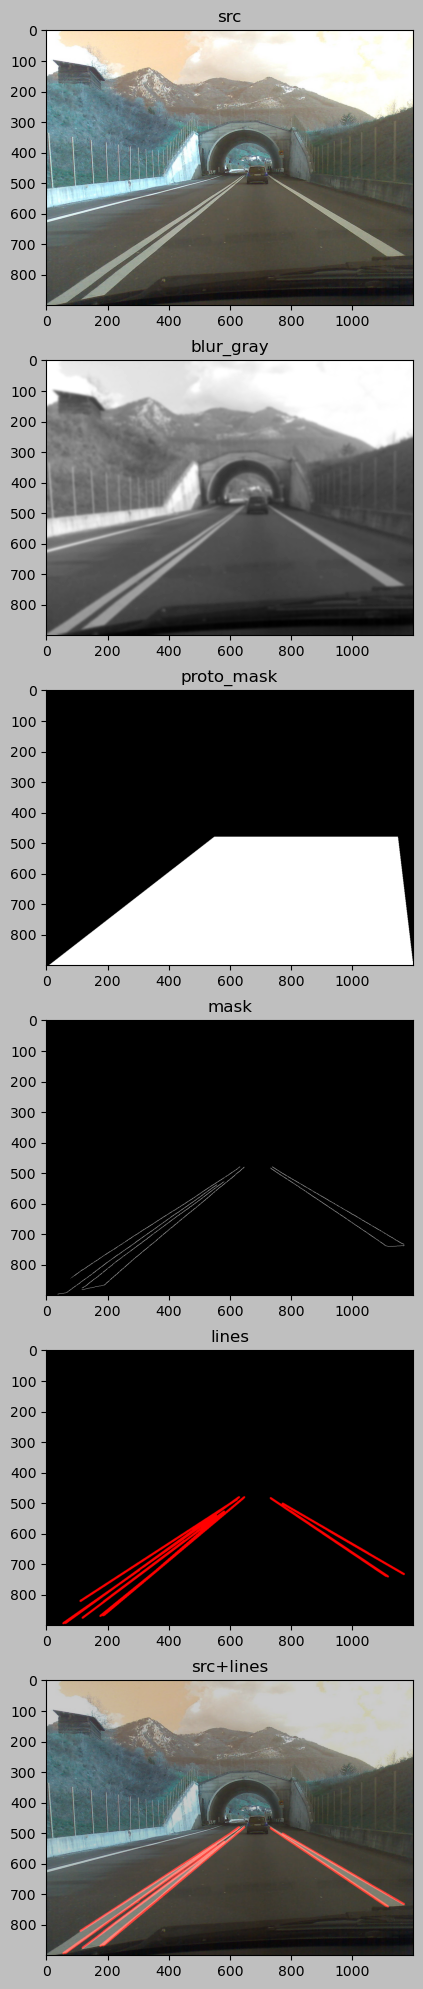

In [182]:
# 걸린 시간 검사
# %%timeit

src = cv2.imread('./image/lane2.jpeg')
gray = grayscale(src)
blur_gray = gaussian_blur(gray, 19)
edges = canny(blur_gray, 50, 75)

# 추출할 차선 영역 지정
imshape = src.shape
vertices = np.array([[(10, imshape[0]), 
                      (550, 480), 
                      (1150, 480),
                      (imshape[1], imshape[0])]],
                   dtype=np.int32)
mask, proto_mask = region_of_interest(edges, vertices)
print("imshape : \n", imshape)
print("vertices : \n", vertices)

# HoughLinesP로 검출
lines = hough_lines(mask, 2, np.pi/180, 100, 100, 250)

# src + lines
lines_edges = weighted_img(lines, src)


plt.style.use("grayscale")
plt.figure(figsize=(20,25))


ax1 = plt.subplot(6,1,1)
ax2 = plt.subplot(6,1,2)
ax3 = plt.subplot(6,1,3)
ax4 = plt.subplot(6,1,4)
ax5 = plt.subplot(6,1,5)
ax6 = plt.subplot(6,1,6)


ax1.imshow(src, cmap="gray")
ax2.imshow(blur_gray)
ax3.imshow(proto_mask)
ax4.imshow(mask)
ax5.imshow(lines)
ax6.imshow(lines_edges, cmap="gray")

# for idx,i in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]) :
#     i.axis('off')

ax1.set_title('src')
ax2.set_title('blur_gray')
ax3.set_title('proto_mask')
ax4.set_title('mask')
ax5.set_title('lines')
ax6.set_title('src+lines')

plt.show()

imshape : 
 (273, 410, 3)
vertices : 
 [[[ 10 273]
  [150  90]
  [350  90]
  [410 273]]]


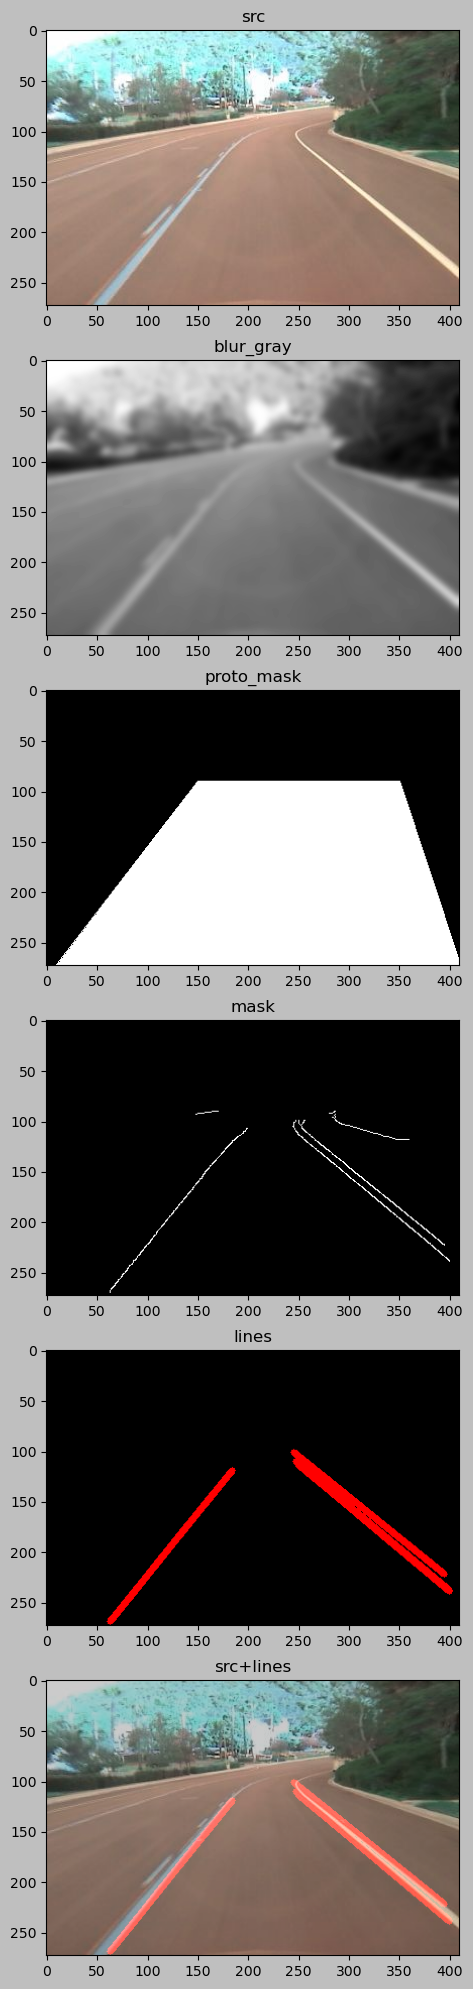

In [180]:
src = cv2.imread('./image/lane3.jpeg')
gray = grayscale(src)
blur_gray = gaussian_blur(gray, 19)
edges = canny(blur_gray, 0, 75)

# 추출할 차선 영역 지정
imshape = src.shape
vertices = np.array([[(10, imshape[0]), 
                      (150, 90), 
                      (350, 90),
                      (imshape[1], imshape[0])]],
                   dtype=np.int32)
mask, proto_mask = region_of_interest(edges, vertices)
print("imshape : \n", imshape)
print("vertices : \n", vertices)

# HoughLinesP로 검출
lines = hough_lines(mask, 2, np.pi/180, 100, 100, 250)

# src + lines
lines_edges = weighted_img(lines, src)


plt.style.use("grayscale")
plt.figure(figsize=(20,25))


ax1 = plt.subplot(6,1,1)
ax2 = plt.subplot(6,1,2)
ax3 = plt.subplot(6,1,3)
ax4 = plt.subplot(6,1,4)
ax5 = plt.subplot(6,1,5)
ax6 = plt.subplot(6,1,6)


ax1.imshow(src, cmap="gray")
ax2.imshow(blur_gray)
ax3.imshow(proto_mask)
ax4.imshow(mask)
ax5.imshow(lines)
ax6.imshow(lines_edges, cmap="gray")

# for idx,i in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]) :
#     i.axis('off')

ax1.set_title('src')
ax2.set_title('blur_gray')
ax3.set_title('proto_mask')
ax4.set_title('mask')
ax5.set_title('lines')
ax6.set_title('src+lines')

plt.show()

# 동영상으로 검출

In [71]:
# 허프라인스만으로 그레이컬러에서 실행
cap = cv2.VideoCapture('./image/lane.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print('frame_size =', frame_size)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    gray = grayscale(frame)
    blur_gray = gaussian_blur(gray, 5)
    edges = canny(blur_gray, 50, 75)

    # 추출할 차선 영역 지정
    imshape = frame.shape
    vertices = np.array([[(100, imshape[0]), 
                          (550, 320), 
                          (650, 320),
                          (imshape[1]-20, imshape[0])]],
                       dtype=np.int32)
    mask, proto_mask = region_of_interest(edges, vertices)

    # HoughLinesP로 검출
    lines = hough_lines(mask, 2, np.pi/180, 100, 100, 250)

    # src + lines
    lines_edges = weighted_img(lines, frame)

    cv2.imshow('lines_edges', lines_edges)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

frame_size = (1280, 720)
1280.0
720.0


-1

# 얼굴 검출
## 영상 검출

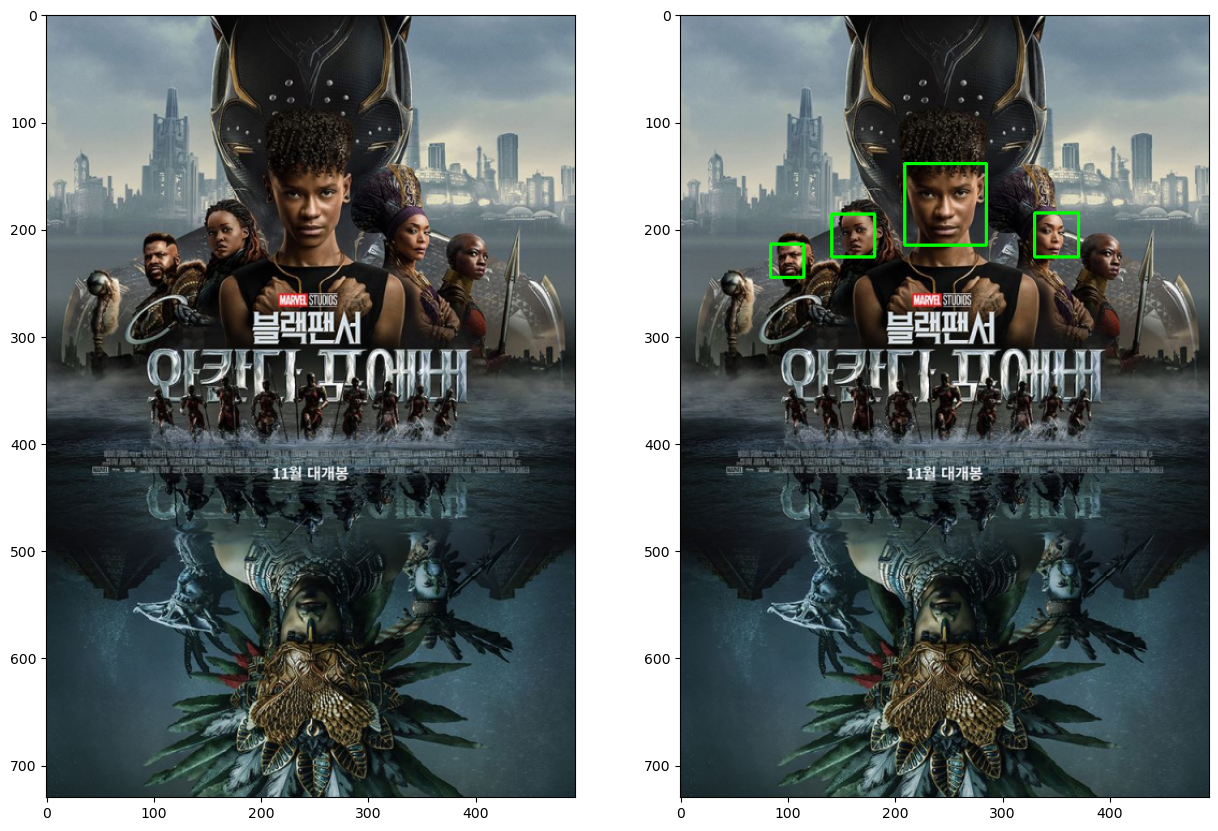

In [81]:
imagePath = './image/wakanda.jpeg'
cascPath = './xml/haarcascade_frontalface_default.xml' # 정면 얼굴에 대한 학습결과 포함

# create the haar cascade
# xml만 넣어주고 detectmultiscale 함수만 호출하면 끝
faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image
image = cv2.imread(imagePath)
image = cv2.resize(image, dsize=(0,0), fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces = faceCascade.detectMultiScale(gray, # xml이 무엇인지에 따라 얼굴이나 번호판을 찾을 수 있다.
                                    minNeighbors=5,  # 얼굴 사이의 최소 간격 (픽셀)
                                    minSize=(20, 20)) # 얼굴의 최소 크기

# 검출된 얼굴 주변에 사각형 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(imageRGB, (x, y), (x+w, y+h), (0,255,0), 2)
    
# 얼굴을 검출한 이미지를 화면에 띄웁니다.
fig = plt.figure(figsize=(15, 16))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax2.imshow(imageRGB)

## 동영상 검출

In [78]:
# 허프라인스만으로 그레이컬러에서 실행
cap = cv2.VideoCapture('./image/face.mp4')
cascPath = './xml/haarcascade_profileface.xml' # 측면 얼굴에 대한 학습결과 포함

while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    # create the haar cascade
    # xml만 넣어주고 detectmultiscale 함수만 호출하면 끝
    faceCascade = cv2.CascadeClassifier(cascPath)

    # Read the image
#     image = cv2.imread(frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces in the image
    faces = faceCascade.detectMultiScale(gray, # xml이 무엇인지에 따라 얼굴이나 번호판을 찾을 수 있다.
                                        minNeighbors=5,  # 얼굴 사이의 최소 간격 (픽셀)
                                        minSize=(20, 20)) # 얼굴의 최소 크기

    # 검출된 얼굴 주변에 사각형 그리기
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)

    cv2.imshow('lines_edges', frame)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
    
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

-1

# XML 학습